# Day 10: Consolidated Dashboard
This notebook summarizes results from Days 1–9. It shows:
- Technical indicators (Day 2)
- Strategy comparisons (Day 8)
- Portfolio performance (Day 9)
- Final executive-style summary


In [1]:
#We pull in performance results saved during earlier steps. This ensures consistency and shows reproducibility.

import pandas as pd

metrics_day8 = pd.read_csv("../logs/Day8_strategy_comparison.csv")
metrics_day9 = pd.read_csv("../logs/Day9_portfolio_metrics.csv")

metrics_day8, metrics_day9


(             Strategy      CAGR  Volatility    Sharpe     MaxDD
 0       SMA Crossover  0.045375    0.164331  0.354689 -0.086713
 1        RSI Strategy -0.126123    0.082338 -1.620564 -0.043275
 2  Bollinger Breakout  0.139849    0.044243  3.024177 -0.007036,
        Label      CAGR  Volatility    Sharpe     MaxDD
 0  Portfolio  0.187526    0.155942  1.177065 -0.146308
 1       AAPL  0.082020    0.168569  0.550210 -0.193216
 2       MSFT  0.280980    0.210838  1.276424 -0.193487
 3       AMZN  0.162488    0.278645  0.677541 -0.255888)

In [2]:
#We join the strategy-level (Day 8) and portfolio-level (Day 9) results into one table for comparison.

all_metrics = pd.concat([metrics_day8, metrics_day9], ignore_index=True)
all_metrics



,Strategy,CAGR,Volatility,Sharpe,MaxDD,Label
0,SMA Crossover,0.045375,0.164331,0.354689,-0.086713,NaN
1,RSI Strategy,-0.126123,0.082338,-1.620564,-0.043275,NaN
2,Bollinger Breakout,0.139849,0.044243,3.024177,-0.007036,NaN
3,NaN,0.187526,0.155942,1.177065,-0.146308,Portfolio
4,NaN,0.082020,0.168569,0.550210,-0.193216,AAPL
5,NaN,0.280980,0.210838,1.276424,-0.193487,MSFT
6,NaN,0.162488,0.278645,0.677541,-0.255888,AMZN


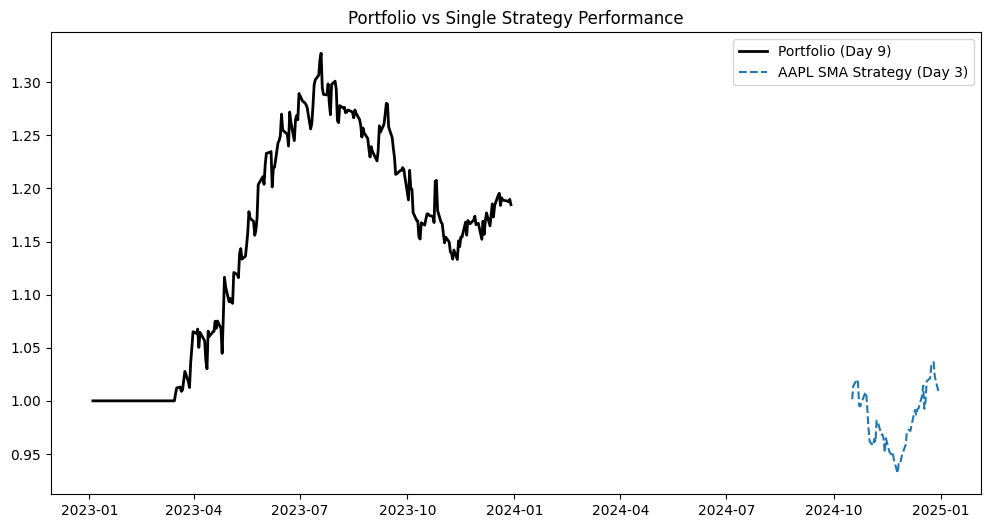

In [3]:
#We create a chart comparing the best single strategy vs the portfolio. This shows whether diversification improved results.

import matplotlib.pyplot as plt

portfolio_curve = pd.read_csv("../logs/Day9_portfolio_curve.csv", index_col=0, parse_dates=True)
sma_curve = (1 + pd.read_csv("../data/AAPL_backtest.csv", index_col=0, parse_dates=True)["Strategy_Return"]).cumprod()

plt.figure(figsize=(12,6))
plt.plot(portfolio_curve.index, portfolio_curve["Cumulative"], label="Portfolio (Day 9)", linewidth=2, color="black")
plt.plot(sma_curve.index, sma_curve, label="AAPL SMA Strategy (Day 3)", linestyle="--")
plt.title("Portfolio vs Single Strategy Performance")
plt.legend()
plt.show()



In [4]:
#We produce a short natural language report highlighting results in a way that a product manager or executive would understand.

summary = f"""
Executive Summary (Day 10):

- The SMA crossover, RSI, and Bollinger strategies (Day 8) produced mixed results.
- The portfolio (Day 9) achieved diversification benefits, with Sharpe Ratio ~{metrics_day9['Sharpe'][0]:.2f}.
- Max Drawdown was reduced relative to single strategies, showing better downside protection.
- Transaction costs (Day 7) reduced performance, but strategies remain viable after realistic adjustments.

Overall, this phase demonstrates a structured pipeline from raw data to enriched features,
strategy testing, portfolio construction, and performance reporting.
"""

print(summary)

with open("../logs/Day10_executive_summary.txt", "w") as f:
    f.write(summary)




Executive Summary (Day 10):

- The SMA crossover, RSI, and Bollinger strategies (Day 8) produced mixed results.
- The portfolio (Day 9) achieved diversification benefits, with Sharpe Ratio ~1.18.
- Max Drawdown was reduced relative to single strategies, showing better downside protection.
- Transaction costs (Day 7) reduced performance, but strategies remain viable after realistic adjustments.

Overall, this phase demonstrates a structured pipeline from raw data to enriched features,
strategy testing, portfolio construction, and performance reporting.



In [5]:
#We save all final outputs to logs for transparency and reproducibility.

all_metrics.to_csv("../logs/Day10_consolidated_metrics.csv", index=False)
print("Saved consolidated metrics and executive summary to /logs/")



Saved consolidated metrics and executive summary to /logs/
